In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
UAV = pd.read_csv('UAV Models.csv',index_col=0)
UAV

,m,Ruav
UAV Model,,
DJI Mavic Mini,0.249,0.1225
DJI Mavic Air 2,0.570,0.0915
DJI Mavic 2 Pro,0.907,0.1610
DJI PHANTOM 4 PRO V2.0,1.375,0.1750
YUNTYHPRBPUS,1.633,0.2600
YUNTYH3EU,1.985,0.2600


In [3]:
def kit_energy(par):
    m = par[0]
    Ruav = par[1]
    #Vx = par[2]
    Energy = []
    for h in range(0,123):
        Ac = math.pi * (Ruav)**2
        Vt = math.sqrt(m * 9.81/(1/2 * 0.3 * Ac * 1.225))
        Vy = Vt**2 * (1-math.exp(-2 * 9.81 * h/(Vt**2)))
        V = Vy #+ Vx**2
        Energy.append(1/2 * m * V) 
        #print(V)
    return(Energy)

#kit_energy(list(UAV.loc['DJI Mavic Mini']))

In [99]:
height = range(0,123)
model = pd.DataFrame(kit_energy(list(UAV.loc['DJI Mavic Mini'])))
model.columns = ['model']
model['height'] = height
modeltype = np.repeat('DJI Mavic Mini',len(height))
model['modeltype'] = modeltype

model2 = pd.DataFrame(kit_energy(list(UAV.loc['DJI Mavic Air 2'])))
model2.columns = ['model']
model2['height'] = height
modeltype2 = np.repeat('DJI Mavic Air 2',len(height))
model2['modeltype'] = modeltype2
model = model.append(model2)

model3 = pd.DataFrame(kit_energy(list(UAV.loc['DJI Mavic 2 Pro'])))
model3.columns = ['model']
model3['height'] = height
modeltype3 = np.repeat('DJI Mavic 2 Pro',len(height))
model3['modeltype'] = modeltype3
model = model.append(model3)

model4 = pd.DataFrame(kit_energy(list(UAV.loc['DJI PHANTOM 4 PRO V2.0'])))
model4.columns = ['model']
model4['height'] = height
modeltype4 = np.repeat('DJI PHANTOM 4 PRO V2.0',len(height))
model4['modeltype'] = modeltype4
model = model.append(model4)

model5 = pd.DataFrame(kit_energy(list(UAV.loc['YUNTYHPRBPUS'])))
model5.columns = ['model']
model5['height'] = height
modeltype5 = np.repeat('YUNTYHPRBPU',len(height))
model5['modeltype'] = modeltype5
model = model.append(model5)

model6 = pd.DataFrame(kit_energy(list(UAV.loc['YUNTYH3EU'])))
model6.columns = ['model']
model6['height'] = height
modeltype6 = np.repeat('YUNTYH3EU',len(height))
model6['modeltype'] = modeltype6
model = model.append(model6)

model.columns = ['Energy','Height','Model Type']

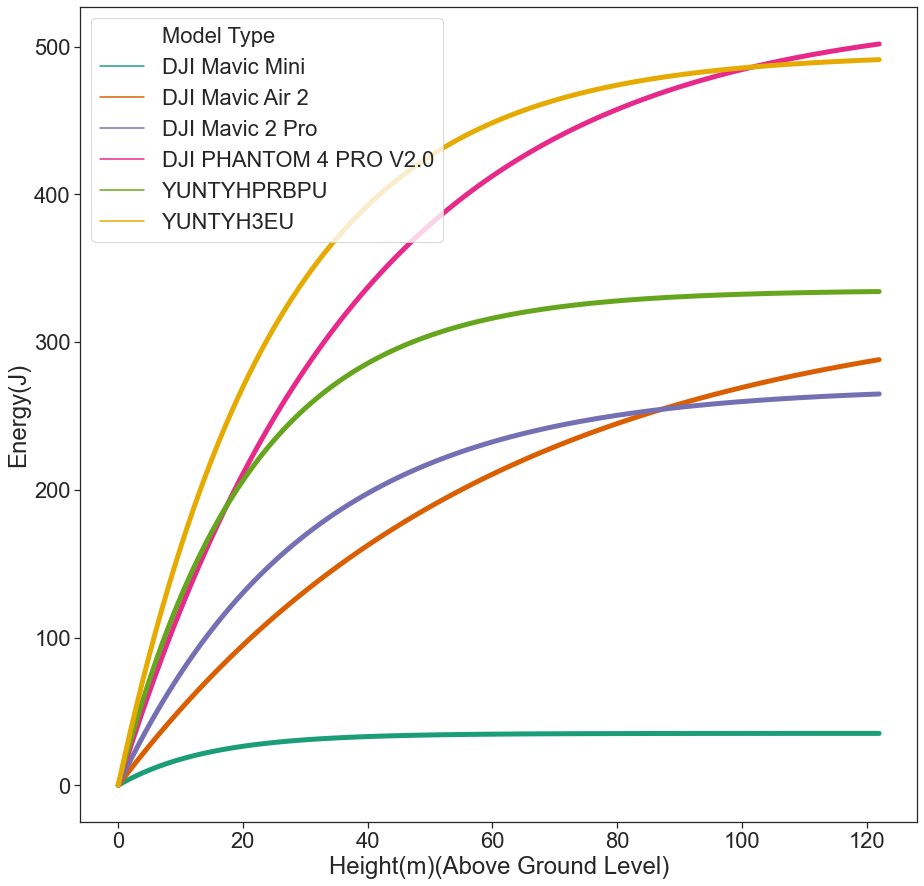

In [101]:

sns.set(font_scale=2)

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)

sns.lineplot(x = 'Height', y = 'Energy', data = model, 
hue= 'Model Type',ax=ax,linewidth=5, palette="Dark2")


plt.xlabel('Height(m)(Above Ground Level)')
plt.ylabel('Energy(J)')

plt.show()

In [230]:
AIS4 = model[model.Energy > 43.94]
AIS4.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/AIS4.csv')

In [231]:
AIS1 = model[(model.Energy <21.36)]
AIS1.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/AIS1.csv')

In [232]:
AIS2 = model[(model.Energy <= 43.94) & (model.Energy > 21.36)]
AIS2.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/AIS2.csv')

In [233]:
AIS3 = model[(model.Energy <= 81.57) & (model.Energy > 43.94)]
AIS3.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/AIS3.csv')

In [4]:
LM = pd.DataFrame(pd.read_csv('LM.csv'))
LM

,Kinetic Energy (J),Peak Force (N),xtest
0,24.6,3022,2200.0
1,27.4,6347,5500.0
2,19.8,3665,11000.0
3,15.4,3171,NaN
4,13.7,2480,NaN
5,16.7,3551,NaN
6,19.6,3376,NaN
7,51.5,5724,NaN
8,58.5,9529,NaN
9,63.4,4701,NaN


In [136]:
from sklearn.metrics import mean_squared_error, r2_score

x_test = np.array([2200,5500,11000])
x_test = x_test.reshape(-1,1)
x = LM.iloc[:,1].values
x = x.reshape(-1,1)
y = LM.iloc[:,0].values
y = y.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)
y_test = regressor.predict(x_test)
y_test = y_test.reshape(-1,1)
y_test

array([[21.36753374],
       [43.94195698],
       [81.56599572]])

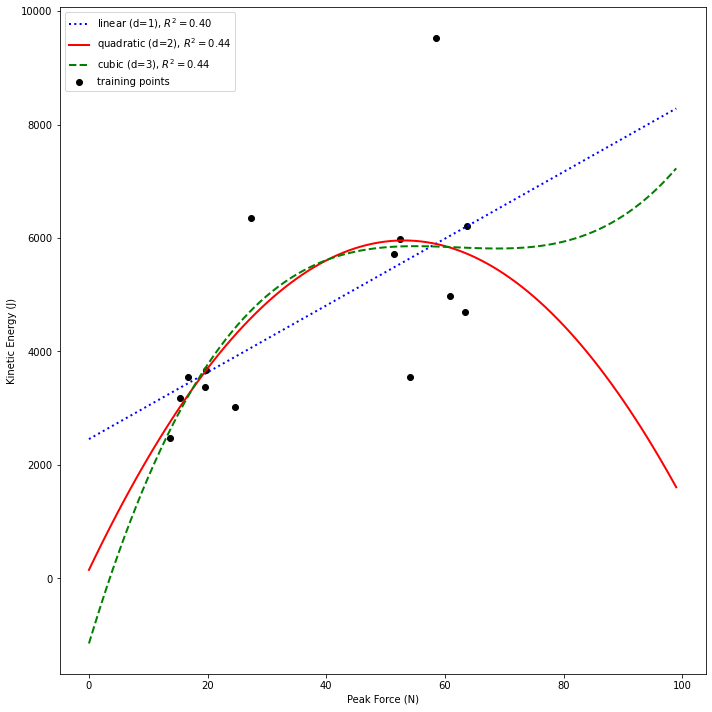

In [9]:
y = LM.iloc[:,1].values.reshape(-1,1)
X = LM.iloc[:,0].values.reshape(-1,1)
 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
 
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
 
X_fit = np.arange(0, 100, 1)[:, np.newaxis]
 
regr = regr.fit(X, y)

y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
 
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


plt.figure(figsize=(10,10))

plt.scatter(X, y, label='training points', color='black')
 
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')
 
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('Peak Force (N)')
plt.ylabel('Kinetic Energy (J)')
plt.legend(loc='upper left',prop={'size': 10})


plt.tight_layout()


plt.show()

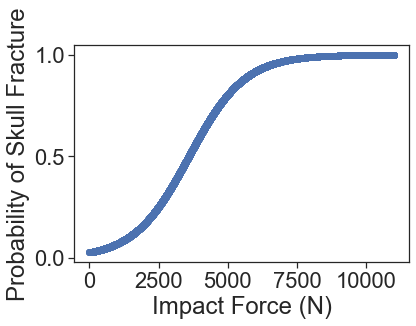

In [279]:

def logistic():
    p = []
    for f in range(0,11001):
        p.append(1/(1+math.exp(-(-3.592+0.001*f))))
    return(p)

df = pd.DataFrame(logistic())
df.columns = ['y']
f = range(0,11001)
df['x'] = f

plt.xlabel('Impact Force (N)')
plt.ylabel('Probability of Skull Fracture')
plt.scatter(x = 'x', y = 'y', data=df)

#vals = ax.get_yticks()
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])